In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

     

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud))*100
print("Number of genuine transactions:", non_fraud)
print("Number of Fraud Transactions:", fraud)
print("Percentage of Fraud Transactions: {:.4f}".format(fraud_percent))

Number of genuine transactions: 284315
Number of Fraud Transactions: 492
Percentage of Fraud Transactions: 0.1727


In [5]:
classCount=df['Class'].value_counts(sort=True)
classCount

Class
0    284315
1       492
Name: count, dtype: int64

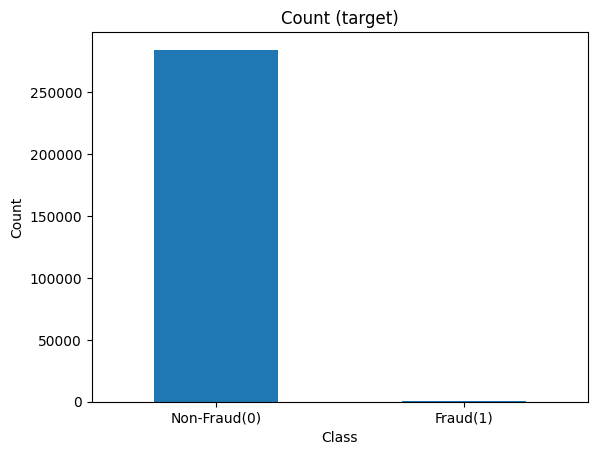

In [6]:
classCount.plot(kind='bar', title='Count (target)')
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Non-Fraud(0)', 'Fraud(1)'], rotation=0)
plt.show()



### Observations
The dataset is highly imbalanced.

Almost all transactions are Non-Fraud, and only a tiny fraction are Fraud.

This is typical in fraud detection datasets: fraudulent cases are rare.

In [7]:
scaler = StandardScaler()
df["NormalAmount"] =  scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df.drop(["Amount","Time"], inplace = True, axis =1)
Y = df["Class"]
X = df.drop(["Class"], axis = 1)

In [8]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
(train_X,test_X,train_Y,test_Y)=train_test_split(X,Y
)
print("Train data shape:",train_X.shape)
print("Test data shape:",test_X.shape)

Train data shape: (213605, 29)
Test data shape: (71202, 29)


In [10]:
# Apply scaling
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)


In [12]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_X_scaled, train_Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
decisionTree=DecisionTreeClassifier()
decisionTree.fit(train_X,train_Y)

predictions=decisionTree.predict(test_X)
decisionTree_score=decisionTree.score(test_X,test_Y)
decisionTree_score

0.9993258616331002

In [14]:
random_forest = RandomForestClassifier(n_estimators= 100,n_jobs=-1)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [15]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decisionTree_score*100)

Random Forest Score:  99.94803516755148
Decision Tree Score:  99.93258616331002


In [16]:
def confusion_matrix_plotting(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
confusion_matrix_dt=confusion_matrix(test_Y,predictions.round())
confusion_matrix_dt

array([[71058,    19],
       [   29,    96]])

Confusion matrix, without normalization
[[71058    19]
 [   29    96]]


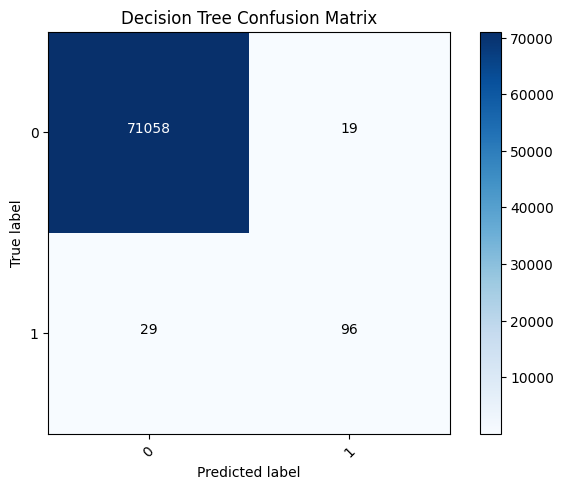

In [18]:
confusion_matrix_plotting(confusion_matrix_dt,classes=[0,1],title='Decision Tree Confusion Matrix')

In [19]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[71070     7]
 [   30    95]]


Confusion matrix, without normalization
[[71070     7]
 [   30    95]]


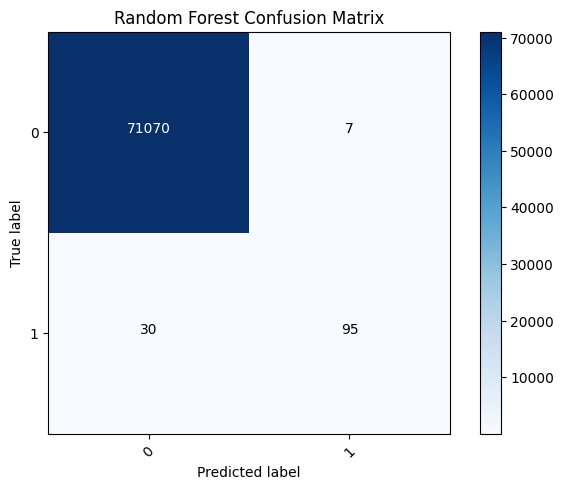

In [20]:
confusion_matrix_plotting(confusion_matrix_rf, classes=[0,1], title='Random Forest Confusion Matrix')

In [21]:
def metrics(av, pv):
    print("Accuracy: {:.5f}".format(accuracy_score(av, pv)))
    print("Precision: {:.5f}".format(precision_score(av, pv)))
    print("Recall: {:.5f}".format(recall_score(av, pv)))
    print("F1-score: {:.5f}".format(f1_score(av, pv)))

In [22]:
print("Random forest evaluation")
metrics(test_Y, predictions_rf.round())


Random forest evaluation
Accuracy: 0.99948
Precision: 0.93137
Recall: 0.76000
F1-score: 0.83700


In [26]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(
    X_resampled, Y_resampled, test_size=0.3, random_state=42
)


Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [27]:
rf_resampled = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [28]:
cm_resampled=confusion_matrix(test_Y,predictions_resampled.round())
print("Random Forest Score after resampling: ")
print(cm_resampled)

Random Forest Score after resampling: 
[[85132    17]
 [    0 85440]]


Confusion matrix, without normalization
[[85132    17]
 [    0 85440]]


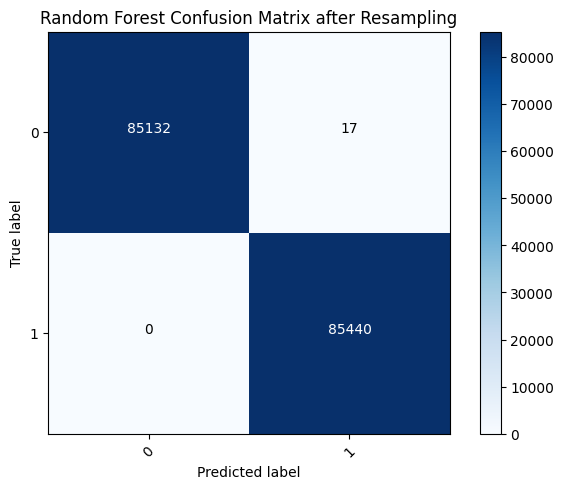

In [29]:
confusion_matrix_plotting(cm_resampled, classes=[0,1], title='Random Forest Confusion Matrix after Resampling')

In [30]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99990
Precision: 0.99980
Recall: 1.00000
F1-score: 0.99990


In [31]:
import joblib
joblib.dump(random_forest,"fraud_model.pkl")

model=joblib.load("fraud_model.pkl")

In [33]:
model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Save scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'fraud_model.pkl')

['fraud_model.pkl']